In [1]:
import numpy as np
import pandas as pd
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 16,4

Populating the interactive namespace from numpy and matplotlib


In [2]:
# series = pd.read_csv('ibm_daily_1962-2018.csv', sep='\t',header=0, squeeze=True)
series = pd.read_csv('ibm_daily_1962-2018.csv', sep='\t',header=0, parse_dates=[0], index_col=0, squeeze=True)

In [3]:
openS = series[['Open']].squeeze()

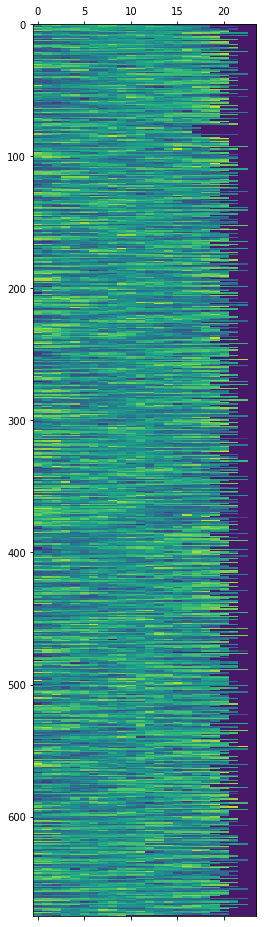

In [4]:
from pandas import Grouper
from pandas import DataFrame
groups2 = openS.groupby(Grouper(freq='M'))   # fa tutto esattamente come per  ts_anni, ma fatto con i mesi (M), 676 mesi

mm2 = DataFrame()
for name, group in groups2:
    norm_values = (group.values - mean(group.values)) / std(group.values)
    # Padding performed to have series of same length -- important only for plotting the matrix
    # Dovrebbe essere 31-... ma le ts non vanno oltre 24 valori
    pad_values = np.pad(norm_values,(0,24-len(norm_values)),'constant',constant_values=-3)
    mm2["%s-%s" % (name.year,name.month)] = pad_values  
matshow(mm2.T, interpolation=None, aspect='auto')

# non credo serva il df, devo avere liste di liste di liste di str

In [5]:
df_list = list()
for name, group in groups2:
    mese = list((group.values - mean(group.values)) / std(group.values))
    df_list.append(mese.copy())

In [6]:
len(df_list)

676

In [7]:
len(df_list[0])

22

In [8]:
# dobbiamo discretizzare i valori di ogni ts per poter fare pattern mining
# quanti bins?? Diverse formule:
# nel nostro caso n=24
# 
# Square-root choice     k = n^(1/2)          --> k = 5
# Sturges' formula       k = log_2(n) + 1     --> k = 6     (Wikipedia dice che doverbbe essere n > 30)
# Rice Rule              k = 2*n^(1/3)        --> k = 6

In [9]:
# ATTENZIONE!! 
# SE DISCRETIZZO CON PD.CUT MI VENGONO BINS DIVERSI, PERCHE' OGNI TS HA VALORE MASSIMO DIVERSO (valore minimo sempre -3)

In [10]:
m = min ([min(mese) for mese in df_list])
M = max ([max(mese) for mese in df_list])
m, M

(-3.45345605809915, 3.1321681714960241)

In [11]:
k = 5
intervals = np.linspace(m, M, k+1)
labels = [chr(ord('a') + i) for i in range(k)]      # questa mi fa la lista delle prime k lettere

In [12]:
for i in range(len(df_list)):
    df_list[i] = list(pd.cut(df_list[i], bins=intervals, labels=labels, right=True, include_lowest=True))

In [13]:
type(df_list)

list

In [14]:
type(df_list[0])

list

In [15]:
type(df_list[0][0])             # dovrebbe essere una lista di stringhe

str

In [16]:
for i in range(len(df_list)):
    for j in range(len(df_list[i])):
        df_list[i][j] = [df_list[i][j]]

In [17]:
type(df_list[0][0])             # ok è una lista

list

In [18]:
type(df_list[0][0][0])          # di stringhe, quindi posso usare a priori   

str

In [19]:
df_list[:20]

[[['d'],
  ['d'],
  ['d'],
  ['d'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['d'],
  ['d'],
  ['d'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['b'],
  ['b'],
  ['b'],
  ['b']],
 [['c'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['b'],
  ['b'],
  ['b'],
  ['b'],
  ['b'],
  ['b']],
 [['b'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['b'],
  ['b'],
  ['b']],
 [['d'],
  ['d'],
  ['c'],
  ['c'],
  ['d'],
  ['c'],
  ['d'],
  ['d'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['b'],
  ['a']],
 [['c'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['c'],
  ['b'],
  ['b'],
  ['b'],
  ['a'],
  ['b']],
 [['e'],
  ['d'],
  ['d'],
  ['d'],
  ['d'],
  ['d

In [20]:
from GSP_simple import *

In [21]:
%%time

result_set = apriori(df_list, 400, verbose=False)
result_set = sorted(result_set, key=lambda freq: freq[1], reverse=True)
result_set = [ (elem, supp) for (elem, supp) in result_set if len(elem) > 3 ]

Wall time: 2.05 s


In [22]:
result_set

[([['c'], ['c'], ['c'], ['c']], 665),
 ([['c'], ['c'], ['c'], ['c'], ['c']], 648),
 ([['d'], ['d'], ['d'], ['d']], 614),
 ([['c'], ['c'], ['c'], ['c'], ['c'], ['c']], 614),
 ([['c'], ['c'], ['c'], ['c'], ['c'], ['c'], ['c']], 553),
 ([['d'], ['d'], ['d'], ['d'], ['d']], 551),
 ([['b'], ['b'], ['b'], ['b']], 549),
 ([['c'], ['c'], ['c'], ['d']], 543),
 ([['b'], ['c'], ['c'], ['c']], 537),
 ([['c'], ['c'], ['d'], ['d']], 533),
 ([['c'], ['d'], ['d'], ['d']], 525),
 ([['b'], ['b'], ['c'], ['c']], 517),
 ([['c'], ['c'], ['c'], ['b']], 511),
 ([['b'], ['b'], ['b'], ['c']], 506),
 ([['c'], ['c'], ['b'], ['b']], 506),
 ([['d'], ['c'], ['c'], ['c']], 502),
 ([['c'], ['c'], ['c'], ['c'], ['d']], 502),
 ([['d'], ['d'], ['d'], ['c']], 501),
 ([['b'], ['c'], ['c'], ['c'], ['c']], 497),
 ([['d'], ['d'], ['c'], ['c']], 495),
 ([['c'], ['c'], ['c'], ['d'], ['d']], 495),
 ([['c'], ['b'], ['b'], ['b']], 491),
 ([['d'], ['d'], ['d'], ['d'], ['d'], ['d']], 485),
 ([['c'], ['c'], ['d'], ['d'], ['d']], 480

In [23]:
# brutto print! facciamo un print un po piu carino
def pretty_print(result_set, intervals):
    for result in result_set:
        (sequence,support) = result
        print("{")
        for element in sequence:
            for event in element:
                print ("[", intervals[ord(event)-ord('a')], intervals[ord(event)-ord('a')+1], "]")
        print("}")
        print (" --> ", support)

In [24]:
pretty_print(result_set, intervals)

{
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
}
 -->  665
{
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
}
 -->  648
{
[ 0.497918479658 1.81504332558 ]
[ 0.497918479658 1.81504332558 ]
[ 0.497918479658 1.81504332558 ]
[ 0.497918479658 1.81504332558 ]
}
 -->  614
{
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
}
 -->  614
{
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
}
 -->  553
{
[ 0.497918479658 1.8150433

{
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -2.13633121218 -0.819206366261 ]
}
 -->  412
{
[ 0.497918479658 1.81504332558 ]
[ 0.497918479658 1.81504332558 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
}
 -->  412
{
[ 0.497918479658 1.81504332558 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -2.13633121218 -0.819206366261 ]
}
 -->  411
{
[ -2.13633121218 -0.819206366261 ]
[ -2.13633121218 -0.819206366261 ]
[ -2.13633121218 -0.819206366261 ]
[ -2.13633121218 -0.819206366261 ]
[ -2.13633121218 -0.819206366261 ]
}
 -->  408
{
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -0.819206366261 0.497918479658 ]
[ -2.13633121218 -0.819206366261 ]
[ -0.819206366261 0.497918479658 ]
}
 -->  408
{
[ -0.819206366261 0.4979

In [25]:
# Cambiamo il numero di bins
k = 8
intervals = np.linspace(m, M, k+1)
labels = [chr(ord('a') + i) for i in range(k)]      # questa mi fa la lista delle prime k lettere

# devo ricreare la lista
df_list = list()
for name, group in groups2:
    mese = list((group.values - mean(group.values)) / std(group.values))
    df_list.append(mese.copy())

# e cambio i bins
for i in range(len(df_list)):
    df_list[i] = list(pd.cut(df_list[i], bins=intervals, labels=labels, right=True, include_lowest=True))
    
# e rifaccio la lista di liste di liste di stringhe
for i in range(len(df_list)):
    for j in range(len(df_list[i])):
        df_list[i][j] = [df_list[i][j]]

In [26]:
result_set = apriori(df_list, 500, verbose=False)
result_set = sorted(result_set, key=lambda freq: freq[1], reverse=True)
result_set = [ (elem, supp) for (elem, supp) in result_set if len(elem) > 3 ]
result_set

[([['e'], ['e'], ['e'], ['e']], 537), ([['d'], ['d'], ['d'], ['d']], 515)]

In [27]:
pretty_print(result_set, intervals)

{
[ -0.160643943302 0.662559085398 ]
[ -0.160643943302 0.662559085398 ]
[ -0.160643943302 0.662559085398 ]
[ -0.160643943302 0.662559085398 ]
}
 -->  537
{
[ -0.983846972001 -0.160643943302 ]
[ -0.983846972001 -0.160643943302 ]
[ -0.983846972001 -0.160643943302 ]
[ -0.983846972001 -0.160643943302 ]
}
 -->  515


In [28]:
# Cambiamo il numero di bins
k = 12
intervals = np.linspace(m, M, k+1)
labels = [chr(ord('a') + i) for i in range(k)]      # questa mi fa la lista delle prime k lettere

# devo ricreare la lista
df_list = list()
for name, group in groups2:
    mese = list((group.values - mean(group.values)) / std(group.values))
    df_list.append(mese.copy())

# e cambio i bins
for i in range(len(df_list)):
    df_list[i] = list(pd.cut(df_list[i], bins=intervals, labels=labels, right=True, include_lowest=True))
    
# e rifaccio la lista di liste di liste di stringhe
for i in range(len(df_list)):
    for j in range(len(df_list[i])):
        df_list[i][j] = [df_list[i][j]]

In [29]:
result_set = apriori(df_list, 300, verbose=False)
result_set = sorted(result_set, key=lambda freq: freq[1], reverse=True)
result_set = [ (elem, supp) for (elem, supp) in result_set if len(elem) > 3 ]
result_set

[([['g'], ['g'], ['g'], ['g']], 349),
 ([['h'], ['h'], ['h'], ['h']], 336),
 ([['f'], ['f'], ['f'], ['f']], 333),
 ([['g'], ['g'], ['h'], ['h']], 310),
 ([['e'], ['e'], ['e'], ['e']], 306),
 ([['f'], ['g'], ['g'], ['g']], 304),
 ([['f'], ['g'], ['h'], ['h']], 303),
 ([['f'], ['e'], ['e'], ['e']], 301),
 ([['g'], ['g'], ['g'], ['h']], 301),
 ([['g'], ['h'], ['h'], ['h']], 300)]

In [30]:
pretty_print(result_set, intervals)

{
[ -0.160643943302 0.388158075831 ]
[ -0.160643943302 0.388158075831 ]
[ -0.160643943302 0.388158075831 ]
[ -0.160643943302 0.388158075831 ]
}
 -->  349
{
[ 0.388158075831 0.936960094964 ]
[ 0.388158075831 0.936960094964 ]
[ 0.388158075831 0.936960094964 ]
[ 0.388158075831 0.936960094964 ]
}
 -->  336
{
[ -0.709445962434 -0.160643943302 ]
[ -0.709445962434 -0.160643943302 ]
[ -0.709445962434 -0.160643943302 ]
[ -0.709445962434 -0.160643943302 ]
}
 -->  333
{
[ -0.160643943302 0.388158075831 ]
[ -0.160643943302 0.388158075831 ]
[ 0.388158075831 0.936960094964 ]
[ 0.388158075831 0.936960094964 ]
}
 -->  310
{
[ -1.25824798157 -0.709445962434 ]
[ -1.25824798157 -0.709445962434 ]
[ -1.25824798157 -0.709445962434 ]
[ -1.25824798157 -0.709445962434 ]
}
 -->  306
{
[ -0.709445962434 -0.160643943302 ]
[ -0.160643943302 0.388158075831 ]
[ -0.160643943302 0.388158075831 ]
[ -0.160643943302 0.388158075831 ]
}
 -->  304
{
[ -0.709445962434 -0.160643943302 ]
[ -0.160643943302 0.388158075831 ]
[ 0.

In [31]:
# Cambiamo il numero di bins
k = 16
intervals = np.linspace(m, M, k+1)
labels = [chr(ord('a') + i) for i in range(k)]      # questa mi fa la lista delle prime k lettere

# devo ricreare la lista
df_list = list()
for name, group in groups2:
    mese = list((group.values - mean(group.values)) / std(group.values))
    df_list.append(mese.copy())

# e cambio i bins
for i in range(len(df_list)):
    df_list[i] = list(pd.cut(df_list[i], bins=intervals, labels=labels, right=True, include_lowest=True))
    
# e rifaccio la lista di liste di liste di stringhe
for i in range(len(df_list)):
    for j in range(len(df_list[i])):
        df_list[i][j] = [df_list[i][j]]

In [32]:
result_set = apriori(df_list, 180, verbose=False)
result_set = sorted(result_set, key=lambda freq: freq[1], reverse=True)
result_set = [ (elem, supp) for (elem, supp) in result_set if len(elem) > 3 ]
result_set

[([['g'], ['g'], ['g'], ['g']], 227),
 ([['i'], ['i'], ['i'], ['i']], 221),
 ([['g'], ['g'], ['g'], ['h']], 215),
 ([['i'], ['i'], ['j'], ['j']], 207),
 ([['i'], ['j'], ['j'], ['j']], 205),
 ([['h'], ['h'], ['h'], ['h']], 203),
 ([['j'], ['j'], ['j'], ['j']], 202),
 ([['j'], ['k'], ['k'], ['k']], 202),
 ([['g'], ['i'], ['j'], ['k']], 201),
 ([['i'], ['i'], ['j'], ['k']], 201),
 ([['g'], ['i'], ['j'], ['j']], 200),
 ([['i'], ['i'], ['i'], ['h']], 200),
 ([['g'], ['g'], ['h'], ['i']], 199),
 ([['j'], ['i'], ['h'], ['g']], 199),
 ([['j'], ['i'], ['i'], ['i']], 199),
 ([['g'], ['h'], ['j'], ['k']], 198),
 ([['h'], ['g'], ['g'], ['g']], 196),
 ([['i'], ['i'], ['h'], ['g']], 195),
 ([['g'], ['h'], ['i'], ['j']], 194),
 ([['i'], ['j'], ['j'], ['k']], 194),
 ([['j'], ['i'], ['i'], ['h']], 194),
 ([['k'], ['k'], ['k'], ['k']], 194),
 ([['h'], ['i'], ['j'], ['k']], 192),
 ([['j'], ['j'], ['j'], ['i']], 192),
 ([['g'], ['g'], ['i'], ['j']], 191),
 ([['i'], ['i'], ['h'], ['h']], 191),
 ([['g'], ['

In [33]:
pretty_print(result_set, intervals)

{
[ -0.983846972001 -0.572245457651 ]
[ -0.983846972001 -0.572245457651 ]
[ -0.983846972001 -0.572245457651 ]
[ -0.983846972001 -0.572245457651 ]
}
 -->  227
{
[ -0.160643943302 0.250957571048 ]
[ -0.160643943302 0.250957571048 ]
[ -0.160643943302 0.250957571048 ]
[ -0.160643943302 0.250957571048 ]
}
 -->  221
{
[ -0.983846972001 -0.572245457651 ]
[ -0.983846972001 -0.572245457651 ]
[ -0.983846972001 -0.572245457651 ]
[ -0.572245457651 -0.160643943302 ]
}
 -->  215
{
[ -0.160643943302 0.250957571048 ]
[ -0.160643943302 0.250957571048 ]
[ 0.250957571048 0.662559085398 ]
[ 0.250957571048 0.662559085398 ]
}
 -->  207
{
[ -0.160643943302 0.250957571048 ]
[ 0.250957571048 0.662559085398 ]
[ 0.250957571048 0.662559085398 ]
[ 0.250957571048 0.662559085398 ]
}
 -->  205
{
[ -0.572245457651 -0.160643943302 ]
[ -0.572245457651 -0.160643943302 ]
[ -0.572245457651 -0.160643943302 ]
[ -0.572245457651 -0.160643943302 ]
}
 -->  203
{
[ 0.250957571048 0.662559085398 ]
[ 0.250957571048 0.662559085398 ]

In [34]:
# Cambiamo il numero di bins
k = 20
intervals = np.linspace(m, M, k+1)
labels = [chr(ord('a') + i) for i in range(k)]      # questa mi fa la lista delle prime k lettere

# devo ricreare la lista
df_list = list()
for name, group in groups2:
    mese = list((group.values - mean(group.values)) / std(group.values))
    df_list.append(mese.copy())

# e cambio i bins
for i in range(len(df_list)):
    df_list[i] = list(pd.cut(df_list[i], bins=intervals, labels=labels, right=True, include_lowest=True))
    
# e rifaccio la lista di liste di liste di stringhe
for i in range(len(df_list)):
    for j in range(len(df_list[i])):
        df_list[i][j] = [df_list[i][j]]

In [35]:
result_set = apriori(df_list, 140, verbose=False)
result_set = sorted(result_set, key=lambda freq: freq[1], reverse=True)
result_set = [ (elem, supp) for (elem, supp) in result_set if len(elem) > 3 ]
result_set

[([['i'], ['i'], ['i'], ['i']], 151),
 ([['h'], ['k'], ['m'], ['n']], 145),
 ([['m'], ['m'], ['m'], ['m']], 142)]

In [36]:
pretty_print(result_set, intervals)

{
[ -0.819206366261 -0.489925154781 ]
[ -0.819206366261 -0.489925154781 ]
[ -0.819206366261 -0.489925154781 ]
[ -0.819206366261 -0.489925154781 ]
}
 -->  151
{
[ -1.14848757774 -0.819206366261 ]
[ -0.160643943302 0.168637268178 ]
[ 0.497918479658 0.827199691138 ]
[ 0.827199691138 1.15648090262 ]
}
 -->  145
{
[ 0.497918479658 0.827199691138 ]
[ 0.497918479658 0.827199691138 ]
[ 0.497918479658 0.827199691138 ]
[ 0.497918479658 0.827199691138 ]
}
 -->  142
